In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_csv('./BankChurners.csv')
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [3]:
df.drop(df.columns[-2:], axis = 1, inplace = True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.isnull().sum()


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
df.drop('CLIENTNUM', axis = 1, inplace = True)
target_col = pd.get_dummies(df['Attrition_Flag'], drop_first = True)

df['target'] = target_col

df.drop('Attrition_Flag', axis = 1, inplace = True)
df.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'target'],
      dtype='object')

In [9]:
df.head(10)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1
5,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,1
6,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,1
7,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,1
8,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,1
9,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,1


In [10]:
df['Gender'].unique()
d = {
    'M': 0,
    'F': 1
}
df['Gender'] = df['Gender'].map(d)

In [11]:
df.head(10)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1
5,44,0,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,1
6,51,0,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,1
7,32,0,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,1
8,37,0,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,1
9,48,0,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,1


In [12]:
d = {
    'Unknown': 0,
    'Single': 1,
    'Married': 2,
    'Divorced': 3
}
df['Marital_Status'] = df['Marital_Status'].map(d)

df['Education_Level'].value_counts().index
d = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
}
df['Education_Level'] = df['Education_Level'].map(d)

df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,45,0,3,2,2,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,1,5,4,1,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,0,3,4,2,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,1,4,2,0,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,0,3,1,2,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [13]:
d = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}
df['Income_Category'] = df['Income_Category'].map(d)

df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,45,0,3,2,2,3,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,1,5,4,1,1,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,0,3,4,2,4,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,1,4,2,0,1,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,0,3,1,2,3,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [14]:
df['Card_Category'].value_counts().index
d = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}
df['Card_Category'] = df['Card_Category'].map(d)

df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,45,0,3,2,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,1,5,4,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,0,3,4,2,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,1,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,0,3,1,2,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [15]:
df.target.value_counts()

1    8500
0    1627
Name: target, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import auc, roc_auc_score, roc_curve
import matplotlib.gridspec as gridspec
plt.style.use('classic')
sns.set()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Marital_Status            10127 non-null  int64  
 5   Income_Category           10127 non-null  int64  
 6   Card_Category             10127 non-null  int64  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

# REMOVAL VARIOUS BECAUSE OF PERFECT CORRELION


In [27]:
df.drop('Avg_Open_To_Buy', axis = 1, inplace = True)
df.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'target'],
      dtype='object')

# Modeling

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='target')

y= df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 18), (2026, 18), (8101,), (2026,))

In [29]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Evaluation

In [30]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator =classifier,X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(),
accuracies.std()*2))

Logistic Regression Classifier Accuracy: 0.90 (+/- 0.01)


In [31]:
from sklearn.metrics import confusion_matrix
y_pred =classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 182,  127],
       [  63, 1654]], dtype=int64)

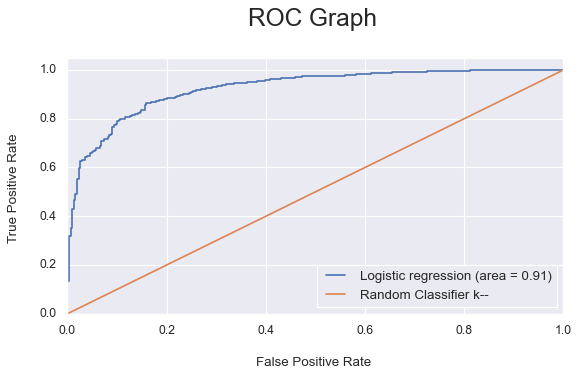

In [32]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 4))
plt.plot(rf_fpr, rf_tpr, 
label='Logistic regression (area = %0.2f)' % classifier_roc_auc)
plt.plot([0,1], [0,1],label='Random Classifier ' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Logit model

In [34]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,1.0,45,0,3,2,2,3,0,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1
1,1.0,49,1,5,4,1,1,0,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105,1
2,1.0,51,0,3,4,2,4,0,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1
3,1.0,40,1,4,2,0,1,0,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,1
4,1.0,40,0,3,1,2,3,0,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,1


In [48]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df_constant.columns[:-1]
model=sm.Logit(df.target,df_constant[cols])
result=model.fit()
result.summary()

C:\Users\Admin\uu\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Admin\uu\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Admin\uu\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\uu\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: inf
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10108
Method:                           MLE   Df Model:                           18
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        16:18:49   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.9465      0.392    -12.604      0.000      -5.716      -4.177
Customer_Age                 0.0063      0.008      0.822      0.411      -0.009       0.021
Gender                      -0.9688      0.127     -7.643      0.000      -1.217      -0.720
Dependent_count             -0.1306      0.030     -4.402      0.000      -0.189      -0.072
Education_Level             -0.0059      0.022     -0.267      0.789      -0.049       0.037
Marital_Status               0.2464      0.052      4.730      0.000       0.144       0.349
Income_Category             -0.1524      0.044     -3.452      0.001      -0.239      -0.066
Card_Category               -0.3929      0.126     -3.128      0.002      -0.639      -0.147
Months_on_book               0.0055      0.008      0.721      0.471      -0.009       0.020
Total_Relationship_Count     0.4499      0.027     16.455      0.000       0.396       0.503
Months_Inactive_12_mon      -0.5078      0.038    -13.474      0.000      -0.582      -0.434
Contacts_Count_12_mon       -0.5105      0.036    -14.041      0.000      -0.582      -0.439
Credit_Limit              1.208e-05   6.29e-06      1.921      0.055   -2.48e-07    2.44e-05
Total_Revolving_Bal          0.0009   7.13e-05     13.226      0.000       0.001       0.001
Total_Amt_Chng_Q4_Q1         0.4171      0.185      2.248      0.025       0.053       0.781
Total_Trans_Amt             -0.0005   2.26e-05    -20.893      0.000      -0.001      -0.000
Total_Trans_Ct               0.1159      0.004     31.717      0.000       0.109       0.123
Total_Ct_Chng_Q4_Q1          2.8231      0.188     15.046      0.000       2.455       3.191
Avg_Utilization_Ratio        0.1064      0.243      0.437      0.662      -0.371       0.583
============================================================================================
"""

# The ability of customers to continue using the bank's card services

In [24]:
y_pred = classifier.predict(X_test)
y_pred_probs = classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
final_results = pd.concat([y_test] , axis = 1).dropna()
final_results['predictions'] = y_pred
final_results['prob'] = y_pred_probs
final_results['prob'] = final_results['prob']*100
final_results['prob']=final_results['prob'].round(2)
final_results = final_results[['predictions', 'prob']]
final_results ['Ranking'] = pd.qcut(final_results['prob'].rank(method = 'first'),10,labels=range(10,0,-1))
print(final_results.sort_values(by='prob', ascending=False))


      predictions   prob Ranking
6150            1  99.99       1
3730            1  99.99       1
190             1  99.99       1
7027            1  99.99       1
2227            1  99.98       1
...           ...    ...     ...
406             0   1.23      10
343             0   1.08      10
8379            0   1.05      10
8574            0   0.87      10
7207            0   0.20      10

[2026 rows x 3 columns]


# Number of customers in each probability interval who want to continue using credit card services

(array([  64.,   54.,   39.,   54.,   35.,   63.,   70.,   96.,  184.,
        1367.]),
 array([ 0.2  , 10.179, 20.158, 30.137, 40.116, 50.095, 60.074, 70.053,
        80.032, 90.011, 99.99 ]),
 <BarContainer object of 10 artists>)

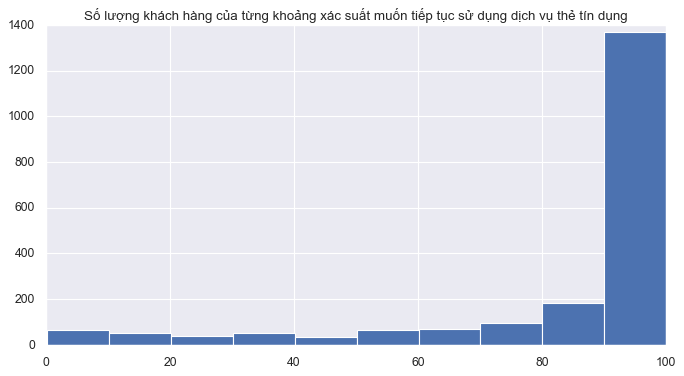

In [25]:
fig = plt.figure(figsize=(10,5))
plt.title('Số lượng khách hàng của từng khoảng xác suất muốn tiếp tục sử dụng dịch vụ thẻ tín dụng')
plt.hist(x=final_results['prob'], bins=10)

In [26]:
final_results.to_excel('./Xác suất muốn tiếp tục sử dụng dịch vụ thẻ tín dụng.xlsx', sheet_name='Sheet1', index = False)